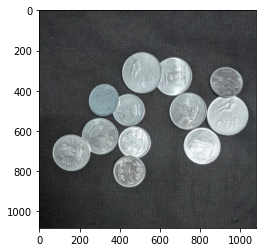

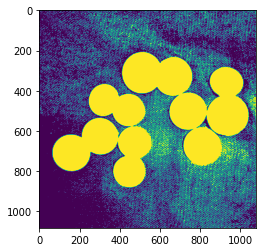

In [75]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('coin/img1.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,70,255,cv2.THRESH_BINARY)

plt.imshow(img)
plt.show()
plt.imshow(thresh)

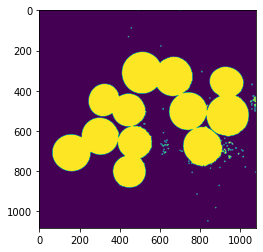

In [84]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening)
plt.show()

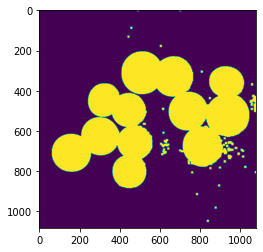

In [85]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg)
plt.show()

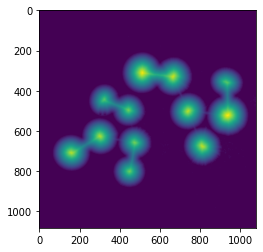

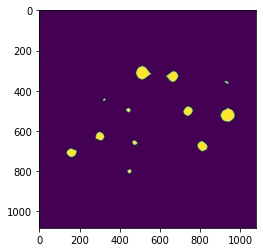

In [86]:
# Finding sure foreground area

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) #(binary_image, distance_type, mask_size)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,cv2.THRESH_BINARY)

plt.imshow(dist_transform)
plt.show()
plt.imshow(sure_fg)
plt.show()



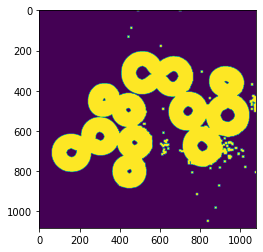

In [87]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown)

In [77]:
'''
The distance transform operator generally takes binary images as inputs. 
In this operation, the gray level intensities of the points inside the foreground regions are changed to 
respective distances from the closest 0 value (boundary).
'''

'\nThe distance transform operator generally takes binary images as inputs. \nIn this operation, the gray level intensities of the points inside the foreground regions are changed to \nrespective distances from the closest 0 value (boundary).\n'

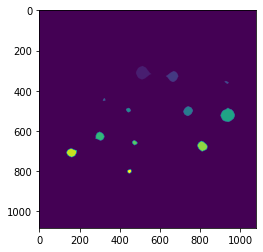

Unique values in matrix are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


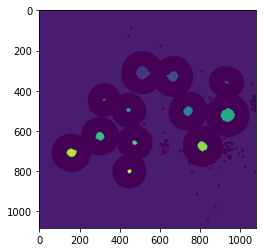

In [129]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers)
plt.show()

res = list(set(i for j in markers for i in j))
# printing result
print ("Unique values in matrix are : " + str(res))


#we dont need entire background to be the valley
markers = markers+1
# Now,we set the unkown region to be the valley
markers[unknown==255] = 0
plt.imshow(markers)

In [130]:
markers = cv2.watershed(img,markers)
#print(markers.max())
img[markers == -1] = [255,0,0]

13


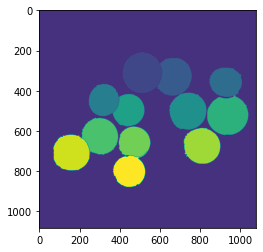

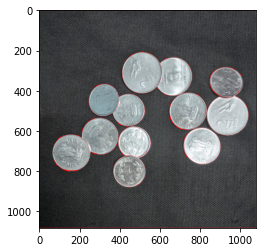

In [131]:

plt.imshow(markers)
plt.show()
plt.imshow(img)

In [118]:
# cv2.imshow('im',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()